In [1]:
import xarray as xr
import sys
sys.path.append("../../")

In [22]:
eps = xr.open_dataset('/Volumes/portableHardDisk/data/thresholds/20year.nc')

In [23]:
eps = eps.rename({'lat': 'latitude'})
eps = eps.rename({'lon': 'longitude'})

eps

<xarray.Dataset>
Dimensions:    (latitude: 1500, longitude: 3600)
Coordinates:
  * latitude   (latitude) float64 -59.95 -59.85 -59.75 ... 89.75 89.85 89.95
  * longitude  (longitude) float64 -179.9 -179.8 -179.8 ... 179.8 179.9 180.0
Data variables:
    Band1      (latitude, longitude) float32 ...
Attributes:
    GDAL_PCRASTER_VALUESCALE:  VS_SCALAR
    Conventions:               CF-1.5
    GDAL:                      GDAL 2.3.3, released 2018/12/14
    history:                   Tue Mar 03 11:41:40 2020: GDAL CreateCopy( 20y...

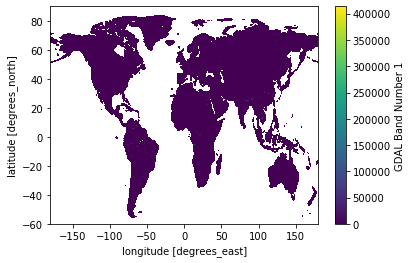

In [24]:
eps['Band1'].plot()

In [15]:
from functions.floodmodel_utils import get_basin_mask, get_river_mask
elbe_basin_mask = get_basin_mask(eps.isel(time=0, ensemble=0)['dis'], 'Elbe')

In [16]:
eps_masked = eps.where(elbe_basin_mask, drop=True)
eps_masked

<xarray.Dataset>
Dimensions:    (ensemble: 51, latitude: 54, longitude: 71, time: 31)
Coordinates:
  * time       (time) datetime64[ns] 2019-11-05 2019-11-06 ... 2019-12-05
  * longitude  (longitude) float32 9.25 9.35 9.45 9.55 ... 16.05 16.15 16.25
  * latitude   (latitude) float32 53.85 53.75 53.65 53.55 ... 48.75 48.65 48.55
  * ensemble   (ensemble) float64 0.0 1.0 2.0 3.0 4.0 ... 47.0 48.0 49.0 50.0
Data variables:
    ups        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    ldd        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rl2        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rl5        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rl20       (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    dis        (time, ensemble, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    history:      Sun Feb 16 23:26:52 2020: cdo -f nc4 -z zip copy tmp.nc /vo...
    Conventions:  CF-1.6
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [17]:
eps_masked

<xarray.Dataset>
Dimensions:    (ensemble: 51, latitude: 54, longitude: 71, time: 31)
Coordinates:
  * time       (time) datetime64[ns] 2019-11-05 2019-11-06 ... 2019-12-05
  * longitude  (longitude) float32 9.25 9.35 9.45 9.55 ... 16.05 16.15 16.25
  * latitude   (latitude) float32 53.85 53.75 53.65 53.55 ... 48.75 48.65 48.55
  * ensemble   (ensemble) float64 0.0 1.0 2.0 3.0 4.0 ... 47.0 48.0 49.0 50.0
Data variables:
    ups        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    ldd        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rl2        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rl5        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    rl20       (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    dis        (time, ensemble, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    history:      Sun Feb 16 23:26:52 2020: cdo -f nc4 -z zip copy tmp.nc /vo...
    Conventions:  CF-1.6
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [18]:
mean_eps_masked = eps_masked.mean(['latitude', 'longitude'])
mean_eps_masked

<xarray.Dataset>
Dimensions:   (ensemble: 51, time: 31)
Coordinates:
  * time      (time) datetime64[ns] 2019-11-05 2019-11-06 ... 2019-12-05
  * ensemble  (ensemble) float64 0.0 1.0 2.0 3.0 4.0 ... 47.0 48.0 49.0 50.0
Data variables:
    ups       float32 25365.314
    ldd       float32 5.9570956
    rl2       float32 255.74088
    rl5       float32 393.31653
    rl20      float32 571.7765
    dis       (time, ensemble) float32 23.731056 23.731056 ... 22.562214